In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train'
valid_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test'

In [5]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
for layer in resnet50.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
#folders = glob('Datasets/train/*')
folders = glob('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\*')

In [10]:
# Flatten Layer
# our layers - you can add more if you want
x = Flatten()(resnet50.output)

In [12]:
#Output Layer
prediction = Dense(len(folders), activation='softmax')(x) # x - appending my flatten layer(x) with dense layer

# create a model object  by combining the entire input's and output's to create the dense neural network
#Here vgg16 is the model or variable that we have created early
model = Model(inputs=resnet50.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
251/251 [==============================] - 215s 857ms/step - loss: 0.9009 - accuracy: 0.5874 - val_loss: 0.8789 - val_accuracy: 0.5606
Epoch 2/20
251/251 [==============================] - 119s 472ms/step - loss: 0.7276 - accuracy: 0.6319 - val_loss: 1.1955 - val_accuracy: 0.5151
Epoch 3/20
251/251 [==============================] - 120s 477ms/step - loss: 0.7798 - accuracy: 0.6497 - val_loss: 0.6310 - val_accuracy: 0.7069
Epoch 4/20
251/251 [==============================] - 108s 431ms/step - loss: 0.8454 - accuracy: 0.6359 - val_loss: 0.8117 - val_accuracy: 0.6372
Epoch 5/20
251/251 [==============================] - 109s 435ms/step - loss: 0.8024 - accuracy: 0.6586 - val_loss: 0.5728 - val_accuracy: 0.7202
Epoch 6/20
251/251 [==============================] - 110s 440ms/step - loss: 0.6909 - accuracy: 0.6753 - val_loss: 0.5574 - val_accuracy: 0.7311
Epoch 7/20
251/251 [==============================] - 113s 448ms/step - loss: 0.7216 - accuracy: 0.6700 - val_loss: 0.6234 -

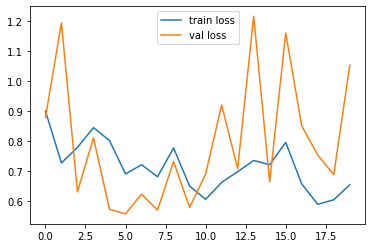

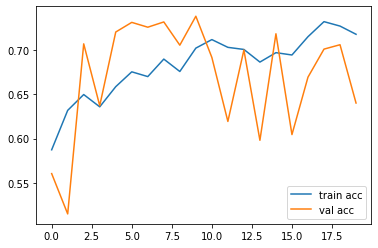

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_Resnet50_CatDog.h5')

In [22]:
#Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_Resnet50_CatDog.h5')

In [23]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\cats\\cat.4038.jpg', target_size = (224, 224))
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4040.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
a=np.argmax(model.predict(test_image), axis=1)
if a==0:
    print("Cat")
else:
    print("Dog")


Dog
